# Eindopdracht

Hallo! Wij, groep 5, werken met de dataset van [Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/overview).  
In onze groep zitten Michiel Anthierens, Tuur Delacroix en Jasper Desnyder.

## Loading packages and dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Column description
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Data exploration

In [4]:
print(f"Description of columns: \n{df_train.dtypes} \n")

Description of columns: 
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object 



In [5]:
print(f"Missing values: \n{df_train.isnull().sum()}\n")

Missing values: 
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64



In [6]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Data cleaning

## Missing values

In [7]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Filling in all the missing values

This section fills in missing values for numerical features such as Age, RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck by taking the mean of the available values and replacing the missing values with that mean value.  
For categorical features such as HomePlanet, CryoSleep, Cabin, Destination, and VIP, the missing values are filled by taking the mode (most common value) of the available values and replacing the missing values with that mode value. The inplace=True parameter ensures that the modifications are made to the original DataFrame instead of creating a copy of it.

In [8]:
df_train['Age'].fillna(df_train["Age"].mean(), inplace=True)
df_train["Age"] = df_train["Age"].astype(int)

df_test['Age'].fillna(df_test["Age"].mean(), inplace=True)
df_test["Age"] = df_test["Age"].astype(int)

In [9]:
df_train['RoomService'].fillna(df_train["RoomService"].mean(), inplace=True)
df_train['FoodCourt'].fillna(df_train["FoodCourt"].mean(), inplace=True)
df_train['ShoppingMall'].fillna(df_train["ShoppingMall"].mean(), inplace=True)
df_train['Spa'].fillna(df_train["Spa"].mean(), inplace=True)
df_train['VRDeck'].fillna(df_train["VRDeck"].mean(), inplace=True)

df_test['RoomService'].fillna(df_test["RoomService"].mean(), inplace=True)
df_test['FoodCourt'].fillna(df_test["FoodCourt"].mean(), inplace=True)
df_test['ShoppingMall'].fillna(df_test["ShoppingMall"].mean(), inplace=True)
df_test['Spa'].fillna(df_test["Spa"].mean(), inplace=True)
df_test['VRDeck'].fillna(df_test["VRDeck"].mean(), inplace=True)

In [10]:
df_train['HomePlanet'].fillna(df_train["HomePlanet"].mode()[0], inplace=True)
df_test['HomePlanet'].fillna(df_test["HomePlanet"].mode()[0], inplace=True)

In [11]:
df_train['CryoSleep'].fillna(df_train["CryoSleep"].mode()[0], inplace=True)
df_test['CryoSleep'].fillna(df_test["CryoSleep"].mode()[0], inplace=True)

In [12]:
df_train['Cabin'].fillna(df_train["Cabin"].mode()[0], inplace=True)
df_test['Cabin'].fillna(df_test["Cabin"].mode()[0], inplace=True)

In [13]:
df_train['Destination'].fillna(df_train["Destination"].mode()[0], inplace=True)
df_test['Destination'].fillna(df_test["Destination"].mode()[0], inplace=True)

In [14]:
df_train['VIP'].fillna(df_train["VIP"].mode()[0], inplace=True)
df_test['VIP'].fillna(df_test["VIP"].mode()[0], inplace=True)

In [15]:
df_train.Name = df_train.Name.fillna("None")
df_test.Name = df_test.Name.fillna("None")

In [16]:
print(f"Missing values:\n{df_train.isnull().sum()}\n")
print(f"Missing values:\n{df_test.isnull().sum()}\n")

Missing values:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

Missing values:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64



In [17]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Visualizing the data

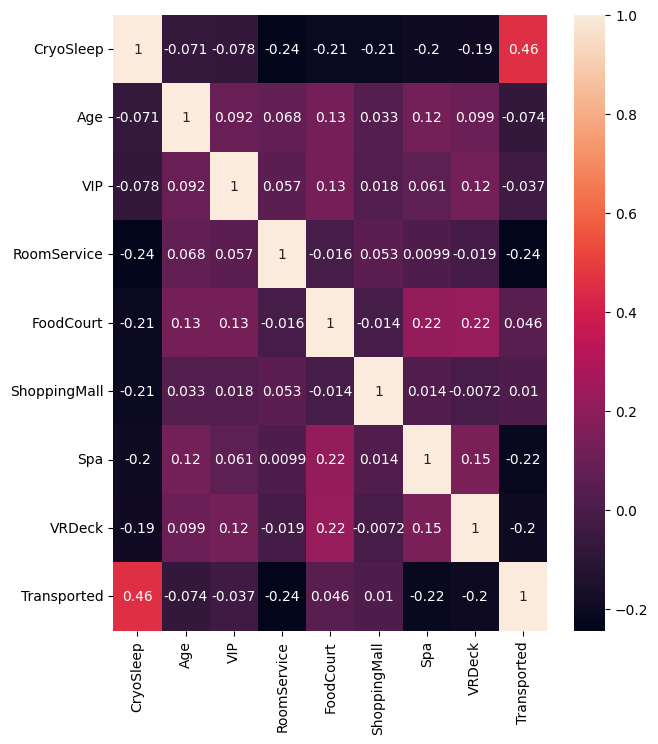

In [18]:
plt.figure(figsize=(7,8))
sns.heatmap(df_train.corr(numeric_only=True), annot=True);

The correlation coefficient, denoted by r, ranges from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.  
A positive correlation means that as one variable increases, the other variable also tends to increase, while a negative correlation means that as one variable increases, the other variable tends to decrease.

### Piechart for Transported column

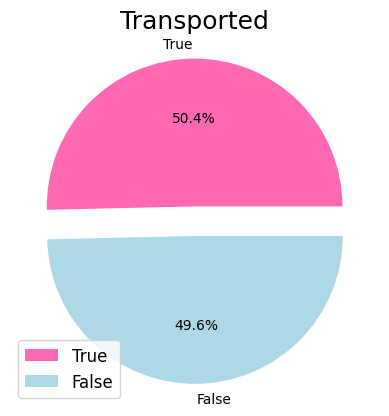

In [19]:
count = df_train['Transported'].value_counts()    # Frequency of values in Transported category
colors = ['hotpink', 'lightblue']                 # Colors for chart
explode = (0.1, 0.1)                              # Slice value

# Create the chart
plt.pie(count.values, explode=explode, labels=count.index, colors=colors, autopct='%.1f%%')
plt.title('Transported', size=18)
plt.legend(['True', 'False'], loc="best", fontsize=12)

# Show the chart
plt.show()

### Barplot for Transported column

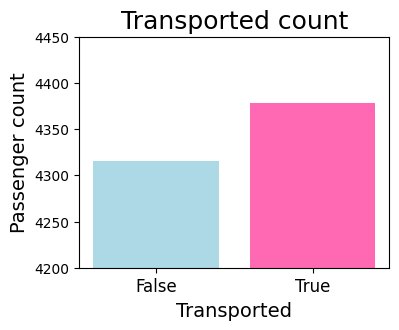

In [20]:
fig, ax = plt.subplots(figsize=(4,3))
ax.bar(df_train['Transported'].value_counts().index, df_train['Transported'].value_counts().values, color=colors)

ax.set_title('Transported count', fontsize=18)
ax.set_xlabel('Transported', fontsize=14)
ax.set_ylabel('Passenger count', fontsize=14)
ax.set_xticks([0,1])  # Setting the graph calibration (=ijking)
ax.set_xticklabels(['False', 'True'], fontsize=12)  # Naming the calibration
ax.set_ylim([4200, 4450])

plt.show()

### Barplot for Transported per HomePlanet

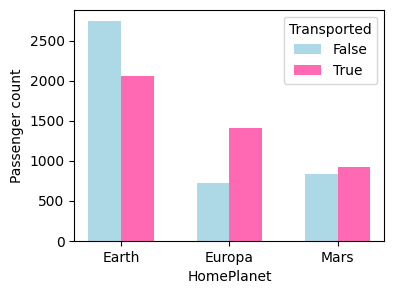

In [21]:
grouped = df_train.groupby(['HomePlanet', 'Transported']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(4,3))
width = 0.3
homeplanets_count = np.arange(len(grouped['HomePlanet'].unique()))
homeplanet_false_transported_total = grouped[grouped['Transported'] == False]['count']
homeplanet_true_transported_total = grouped[grouped['Transported'] == True]['count']

ax.bar(homeplanets_count, homeplanet_false_transported_total, color='lightblue', label='False', width=width)
ax.bar(homeplanets_count + width, homeplanet_true_transported_total, color='hotpink', label='True', width=width)

ax.set_xlabel('HomePlanet')
ax.set_ylabel('Passenger count')
ax.legend(loc="best", title="Transported")
ax.set_xticks(homeplanets_count + width / 2)
ax.set_xticklabels(grouped['HomePlanet'].unique())

plt.show()

### Barplot for Transported in CryoSleep

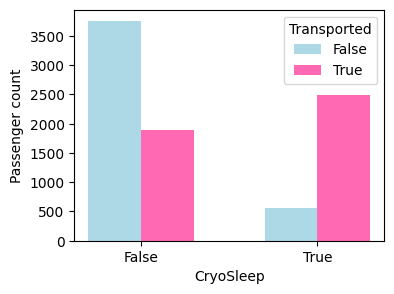

In [22]:
grouped = df_train.groupby(['CryoSleep', 'Transported']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(4,3))
width = 0.3
cryosleep_count = np.arange(len(grouped['CryoSleep'].unique()))
cryosleep_false_transported_total = grouped[grouped['Transported'] == False]['count']
cryosleep_true_transported_total = grouped[grouped['Transported'] == True]['count']

ax.bar(cryosleep_count, cryosleep_false_transported_total, color='lightblue', label='False', width=width)
ax.bar(cryosleep_count + width, cryosleep_true_transported_total, color='hotpink', label='True', width=width)

ax.set_xlabel('CryoSleep')
ax.set_ylabel('Passenger count')
ax.legend(loc="best", title="Transported")
ax.set_xticks(cryosleep_count + width / 2)
ax.set_xticklabels(grouped['CryoSleep'].unique())

plt.show()

### Distribution of Age per Transported

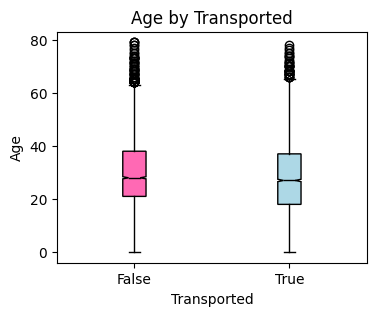

In [23]:
fig, ax = plt.subplots(figsize=(4,3))

not_transported_ages = df_train[df_train['Transported'] == False]['Age']
transported_ages = df_train[df_train['Transported'] == True]['Age']

boxplot = ax.boxplot([not_transported_ages, transported_ages], notch=True, patch_artist=True)
# Customize colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
for median, color in zip(boxplot['medians'], colors):
    median.set_color('black')

ax.set_xticklabels(['False', 'True'])
ax.set_xlabel('Transported')
ax.set_ylabel('Age')
ax.set_title('Age by Transported')

plt.show()

# Feature engineering

## Categorical Values

In [24]:
print(f'Unique Values in HomePlanet: {df_train["HomePlanet"].unique()} \n')
print(f'Unique Values in CryoSleep: {df_train["CryoSleep"].unique()} \n')
print(f'Unique Values in Cabin: {df_train["Cabin"].unique()} \n')
print(f'Unique Values in Destination: {df_train["Destination"].unique()} \n')
print(f'Unique Values in VIP: {df_train["VIP"].unique()} \n')

Unique Values in HomePlanet: ['Europa' 'Earth' 'Mars'] 

Unique Values in CryoSleep: [False  True] 

Unique Values in Cabin: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 

Unique Values in Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e'] 

Unique Values in VIP: [False  True] 



In [25]:
df_train.replace({
    'HomePlanet': {'Europa': 0, 'Earth': 1, 'Mars': 2},
    'Destination': {'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2},
    'Deck': {'B': 0, 'F': 1, 'A': 2, 'G': 3, 'E': 4, 'D': 5, 'C': 6, 'T': 7},
    'Side': {'P': 0, 'S': 1}
}, inplace=True)

df_test.replace({
    'HomePlanet': {'Europa': 0, 'Earth': 1, 'Mars': 2},
    'Destination': {'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2},
    'Deck': {'B': 0, 'F': 1, 'A': 2, 'G': 3, 'E': 4, 'D': 5, 'C': 6, 'T': 7},
    'Side': {'P': 0, 'S': 1}
}, inplace=True)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   int64  
 5   Age           8693 non-null   int32  
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(5), int32(1), int64(2), object(3)
memory usage: 738.7+ KB


## Splitting into targets and features

In [27]:
# Features: HomePlanet, CryoSleep, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck (10)
X = df_train.drop(columns= ['PassengerId', 'Cabin', 'Name', 'Transported'], axis=1)
y = df_train['Transported']

print(f'Shape of Features: {X.shape}')
print(f'Shape of Targets: {y.shape}')

X.head()

Shape of Features: (8693, 10)
Shape of Targets: (8693,)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,False,0,39,False,0.0,0.0,0.0,0.0,0.0
1,1,False,0,24,False,109.0,9.0,25.0,549.0,44.0
2,0,False,0,58,True,43.0,3576.0,0.0,6715.0,49.0
3,0,False,0,33,False,0.0,1283.0,371.0,3329.0,193.0
4,1,False,0,16,False,303.0,70.0,151.0,565.0,2.0


## Splitting into training and test data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (6954, 10)
Shape of X_test: (1739, 10)
Shape of y_train: (6954,)
Shape of y_test: (1739,)


### Train and evaluate model

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

### Calculate metrics

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [31]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

Accuracy: 0.7837837837837838
Precision: 0.8085351787773933
Recall: 0.7694840834248079
F1 score: 0.7885264341957255


### Finding the best hyperparameters

In [32]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [5, 10, 15, 20, None],
              'max_features': ['sqrt', 'log2', None]}

cv = GridSearchCV(rfc, param_grid, scoring='f1', cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1')

In [33]:
print("Best hyperparameters:", cv.best_params_)

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}


### Train model with best hyperparameters

In [34]:
rfc_tuned = RandomForestClassifier(**cv.best_params_)
rfc_tuned.fit(X_train, y_train)
y_pred_tuned = rfc_tuned.predict(X_test)

### Calculate metrics with tuned model

In [35]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

In [36]:
print(f"Tuned accuracy: {accuracy_tuned}")
print(f"Tuned precision: {precision_tuned}")
print(f"Tuned recall: {recall_tuned}")
print(f"Tuned F1 score: {f1_tuned}")

Tuned accuracy: 0.7952846463484762
Tuned precision: 0.7993527508090615
Tuned recall: 0.8133918770581778
Tuned F1 score: 0.806311207834603


### Store metrics in a dictionary

In [37]:
metrics_performance = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 score': f1,
    'Tuned Accuracy': accuracy_tuned,
    'Tuned Precision': precision_tuned,
    'Tuned Recall': recall_tuned,
    'Tuned F1 score': f1_tuned
}

In [38]:
ultrasuperdupermodel = rfc_tuned

## Loading and preprocessing test data

In [39]:
df_test.replace({
    "HomePlanet": {'Europa':0, 'Earth':1, 'Mars':2},
    "Destination": {'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2}
}, inplace=True)

In [40]:
df_test_x = df_test.drop(columns=['PassengerId', 'Cabin', 'Name'], axis=1)

# Modelling

In [41]:
model = SVC()
model.fit(X_train, y_train)

SVC()

# Supervised learning

In [42]:
df_test_predictions = model.predict(df_test_x)

# Submission

In [43]:
submission = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Transported': df_test_predictions})
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


## Convert result to csv file

In [44]:
submission.to_csv('big-data-submission-groep5.csv', index=False)